## Домашнее задание к лекции "Базовые понятия статистики"



## Обязательная часть 
 
Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 
 
### Задание 1. Базовое изучение 
 
Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты. 

### Задание 2. Работа с выбросами 
 
В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними. 

### Задание 3. Работа с пропусками 
 
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [41]:
import pandas as pd
import missingno as msno 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
all_horses_df = pd.read_csv('horse_data.csv', names=['surgery', 'Age', 'Hospital_Number', 'rectal_temperature', 'pulse', 'respiratory_rate', 'temperature_of_extremities', 'peripheral_pulse', 'mucous_membranes', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distension', 'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_PH', 'rectal_examination_feces', 'abdomen', 'packed_cell_volume', 'total_protein', 'abdominocentesis_appearance', 'abdomcentesis_total_protein', 'outcome', 'surgical_lesion', 'type_of_lesion_1', 'type_of_lesion_2', 'type_of_lesion_3', 'cp_data'])

Преобразовать числовые столбцы в числа, пропуски в Nan, категорийные в слова

In [3]:
# Заменяем пропуски значений ? на NaN

all_horses_df = all_horses_df.replace({'?': np.nan})

In [4]:
all_horses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   surgery                      299 non-null    object
 1   Age                          300 non-null    int64 
 2   Hospital_Number              300 non-null    int64 
 3   rectal_temperature           240 non-null    object
 4   pulse                        276 non-null    object
 5   respiratory_rate             242 non-null    object
 6   temperature_of_extremities   244 non-null    object
 7   peripheral_pulse             231 non-null    object
 8   mucous_membranes             253 non-null    object
 9   capillary_refill_time        268 non-null    object
 10  pain                         245 non-null    object
 11  peristalsis                  256 non-null    object
 12  abdominal_distension         244 non-null    object
 13  nasogastric_tube             196 no

### Пропущенные значения


In [30]:
all_horses_df.isna().sum()

surgery                          0
Age                              0
Hospital_Number                  0
rectal_temperature              60
pulse                           24
respiratory_rate                58
temperature_of_extremities      56
peripheral_pulse                69
mucous_membranes                47
capillary_refill_time           32
pain                            55
peristalsis                     44
abdominal_distension            56
nasogastric_tube               104
nasogastric_reflux             106
nasogastric_reflux_PH          247
rectal_examination_feces       102
abdomen                        118
packed_cell_volume              29
total_protein                   33
abdominocentesis_appearance    165
abdomcentesis_total_protein    198
outcome                          1
surgical_lesion                  0
type_of_lesion_1                 0
type_of_lesion_2                 0
type_of_lesion_3                 0
cp_data                          0
dtype: int64

<AxesSubplot:>

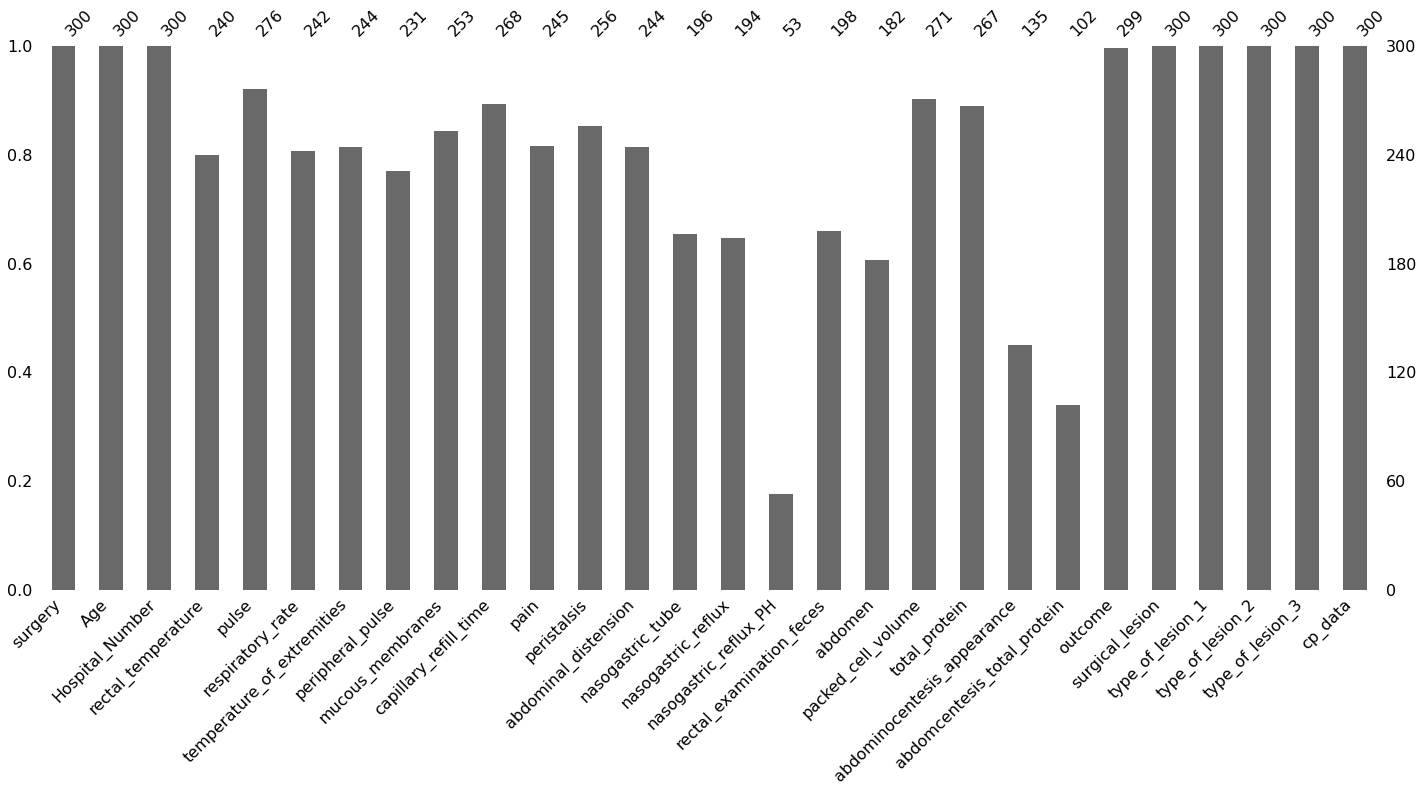

In [31]:
msno.bar(all_horses_df)


<AxesSubplot:>

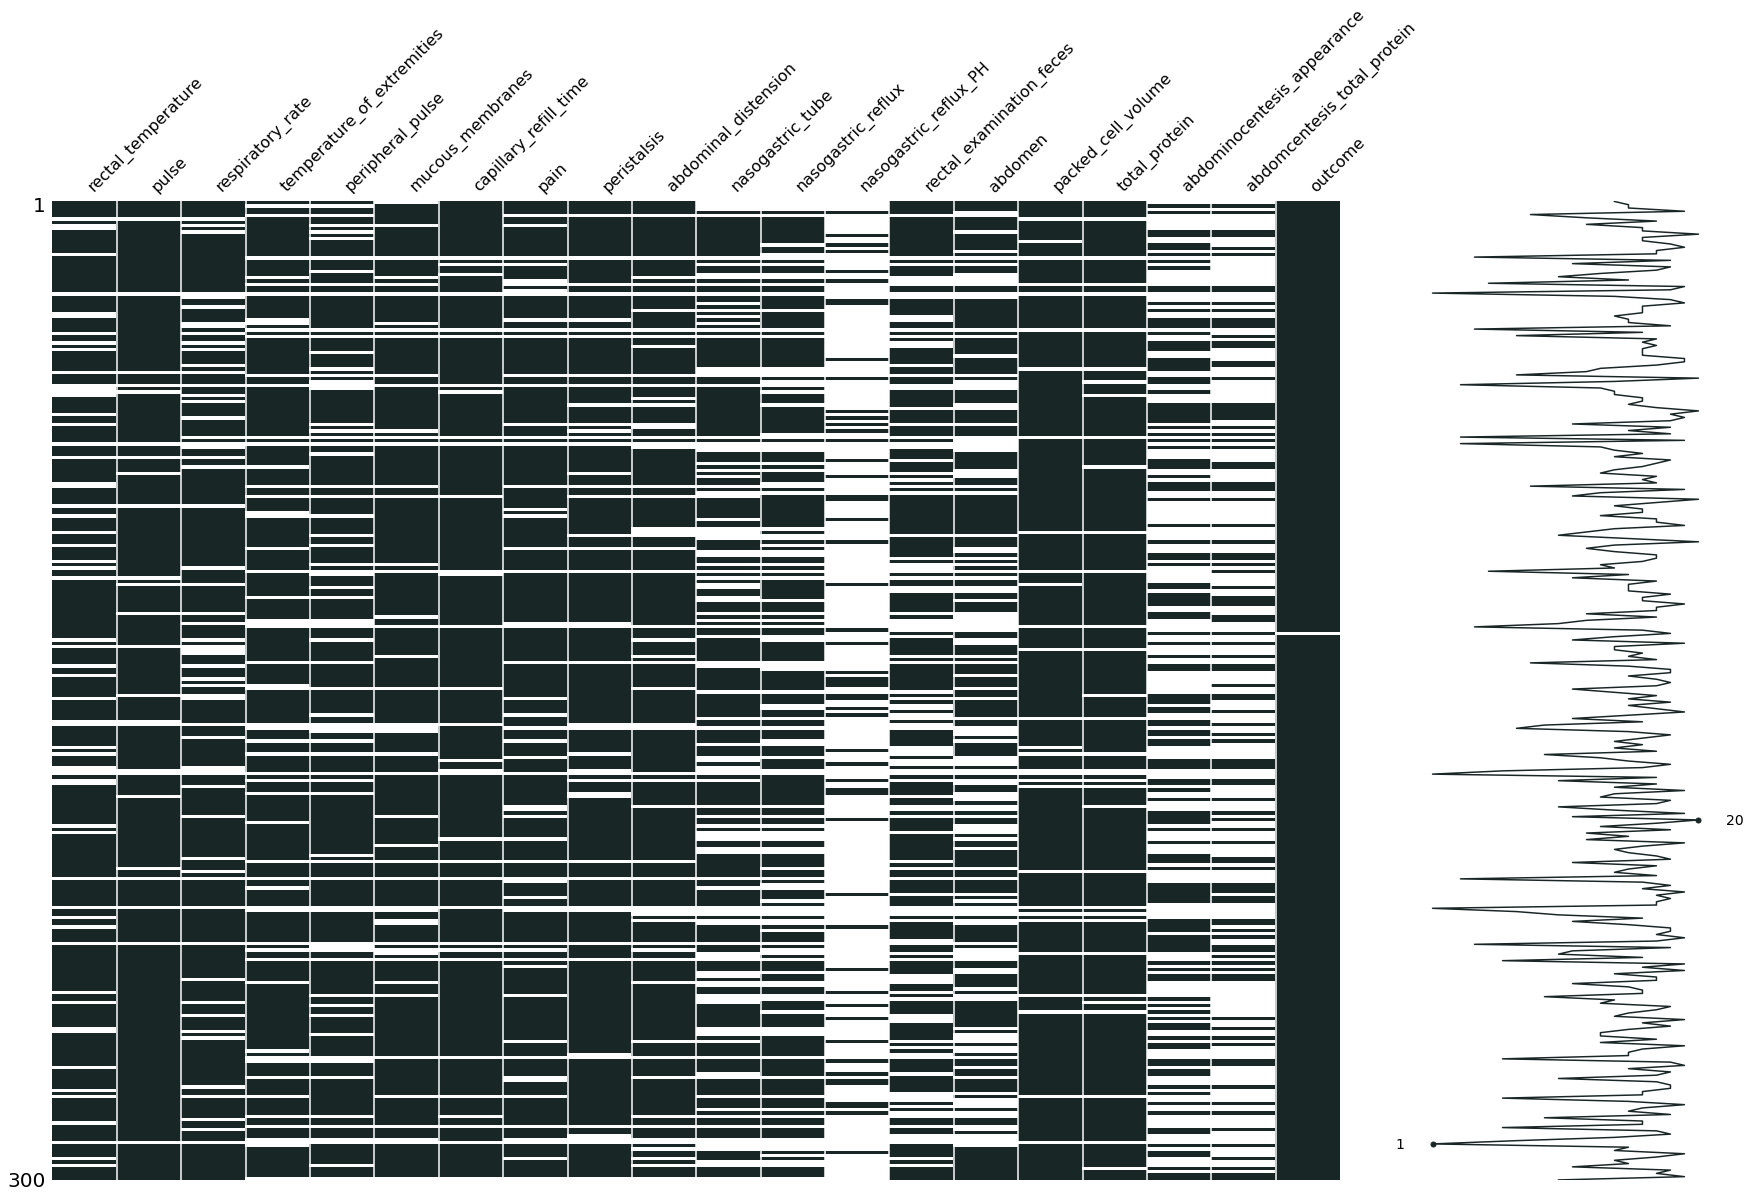

In [32]:
msno.matrix(
    all_horses_df[[ 'rectal_temperature', 'pulse', 'respiratory_rate', 
                   'temperature_of_extremities', 'peripheral_pulse', 
                   'mucous_membranes', 'capillary_refill_time', 'pain', 
                   'peristalsis', 'abdominal_distension', 'nasogastric_tube', 
                   'nasogastric_reflux', 'nasogastric_reflux_PH', 'rectal_examination_feces', 
                   'abdomen', 'packed_cell_volume', 'total_protein', 
                   'abdominocentesis_appearance', 'abdomcentesis_total_protein', 'outcome' ]], 
    figsize=(30,18), width_ratios=(20, 5), color=(0.1, 0.15, 0.15)
)

<AxesSubplot:>

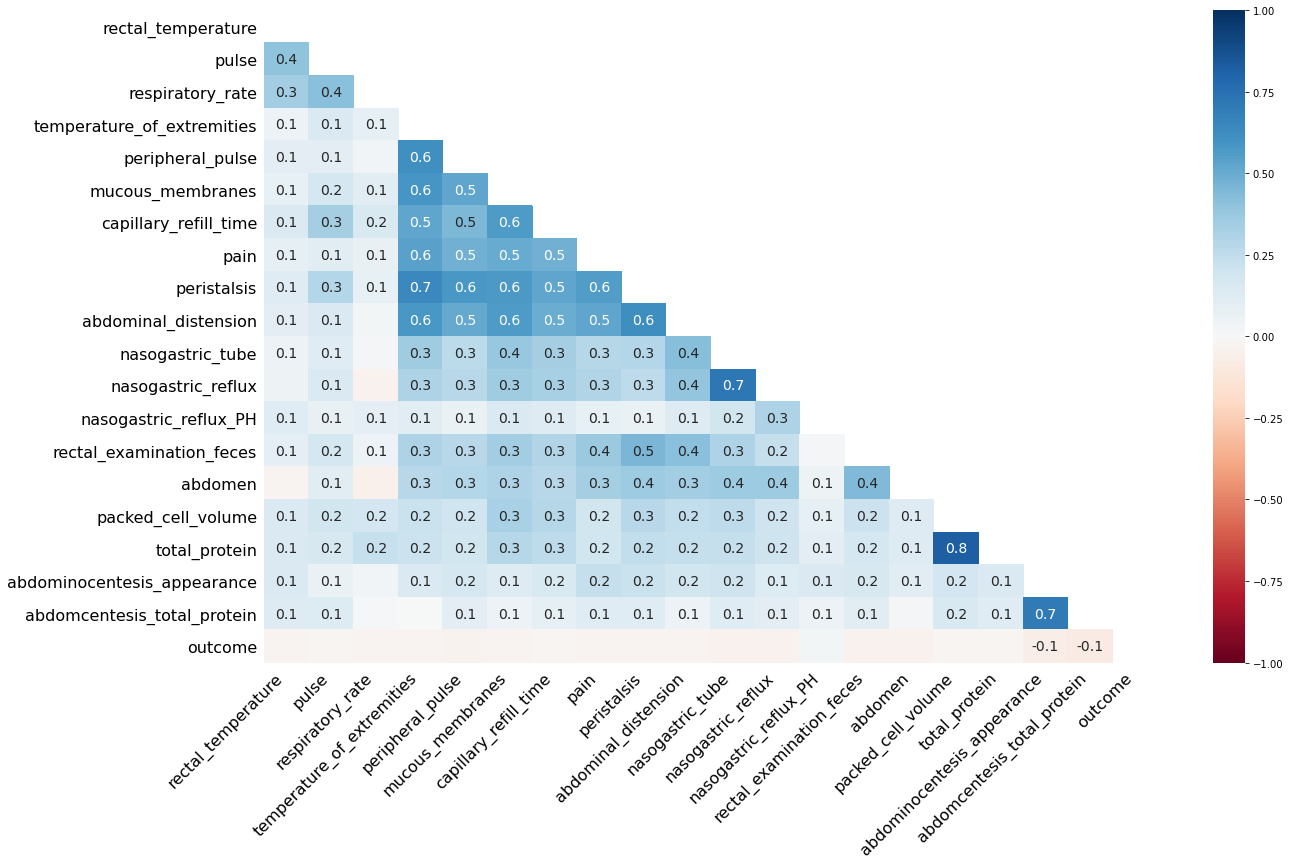

In [33]:
msno.heatmap(all_horses_df)


## Описание и преобразование колонок

Значение некоторых столбцов необходимо из строкового типа преобразовать в float

In [5]:
all_horses_df[[ 'rectal_temperature', 'packed_cell_volume', 'total_protein', 'nasogastric_reflux_PH', 'abdomcentesis_total_protein', 'pulse', 'respiratory_rate']] = all_horses_df[[ 'rectal_temperature', 'packed_cell_volume', 'total_protein', 'nasogastric_reflux_PH', 'abdomcentesis_total_protein', 'pulse', 'respiratory_rate']].astype('float')

In [6]:
all_horses_df

,surgery,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,pain,peristalsis,abdominal_distension,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_PH,rectal_examination_feces,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion,type_of_lesion_1,type_of_lesion_2,type_of_lesion_3,cp_data
0,2,1,530101,38.5,66.0,28.0,3,3,NaN,2,5,4,4,NaN,NaN,NaN,3,5,45.0,8.4,NaN,NaN,2,2,11300,0,0,2
1,1,1,534817,39.2,88.0,20.0,NaN,NaN,4,1,3,4,2,NaN,NaN,NaN,4,2,50.0,85.0,2,2.0,3,2,2208,0,0,2
2,2,1,530334,38.3,40.0,24.0,1,1,3,1,3,3,1,NaN,NaN,NaN,1,1,33.0,6.7,NaN,NaN,1,2,0,0,0,1
3,1,9,5290409,39.1,164.0,84.0,4,1,6,2,2,4,4,1,2,5.0,3,NaN,48.0,7.2,3,5.3,2,1,2208,0,0,1
4,2,1,530255,37.3,104.0,35.0,NaN,NaN,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,NaN,120.0,70.0,4,NaN,4,2,2,4,NaN,NaN,NaN,NaN,NaN,5,55.0,65.0,NaN,NaN,3,2,3205,0,0,2
296,2,1,527702,37.2,72.0,24.0,3,2,4,2,4,3,3,3,1,NaN,4,4,44.0,NaN,3,3.3,3,1,2208,0,0,1
297,1,1,529386,37.5,72.0,30.0,4,3,4,1,4,4,3,2,1,NaN,3,5,60.0,6.8,NaN,NaN,2,1,3205,0,0,2
298,1,1,530612,36.5,100.0,24.0,3,3,3,1,3,3,3,3,1,NaN,4,4,50.0,6.0,3,3.4,1,1,2208,0,0,1


### surgery

Проводили ли операцию для лошади?

surgery? 

1 = Yes, it had surgery

2 = It was treated without surgery
          
**Категорийное значение**


In [7]:
# заменяем числовое значение на текстовое для удобства

all_horses_df['surgery'] = all_horses_df['surgery'].replace({'1': 'surgery', '2': 'no_surgery'})

In [8]:
all_horses_df['surgery'].value_counts()

surgery       180
no_surgery    119
Name: surgery, dtype: int64

In [9]:
all_horses_df['surgery'].isna().sum() 

1

<AxesSubplot:>

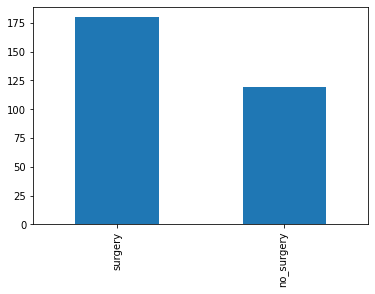

In [10]:
all_horses_df['surgery'].value_counts().plot(kind='bar')

# большая часть лошадей проходила операцию

In [11]:
# есть 1 пропущенное значение, можно восстановить значение по колонкам: surgical lesion, type of lesion1,2,3

all_horses_df[ all_horses_df['surgery'].isna() ][['surgery', 'surgical_lesion',
                                                  'type_of_lesion_1', 'type_of_lesion_2', 'type_of_lesion_3']]

,surgery,surgical_lesion,type_of_lesion_1,type_of_lesion_2,type_of_lesion_3
132,NaN,1,3111,0,0


Исходя из данных можно сделать вывод, что лошадь проходила операцию и данные об этом были случайно утеряны. Имеет смысл заменить NaN на surgery

In [12]:
all_horses_df['surgery'].iloc[132] = 'surgery'

C:\Users\ivnat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
had_surg = all_horses_df['surgery'][ all_horses_df['surgery'] == 'surgery' ].count()
no_surg = all_horses_df['surgery'][ all_horses_df['surgery'] == 'no_surgery' ].count()

print(f'Horses that had surgery: {had_surg}, {round(had_surg/all_horses_df["surgery"].count()*100, 1)}%')
print(f'Horses that hadn\'t surgery: {no_surg}, {round(no_surg/all_horses_df["surgery"].count()*100, 1)}%')

Horses that had surgery: 181, 60.3%
Horses that hadn't surgery: 119, 39.7%


### Age

Возраст лошади

1 = Adult horse

2 = Young (< 6 months)

**Категорийное значение**

In [14]:
all_horses_df['Age'].value_counts()

1    276
9     24
Name: Age, dtype: int64

Скорее всего, значение 9 было указано вместо 2 и означает молодую лошадь. Заменим значения на текстовые.
Пропущенных значений нет

In [15]:
all_horses_df['Age'] = all_horses_df['Age'].replace({1: 'adult', 9: 'young'})

<AxesSubplot:>

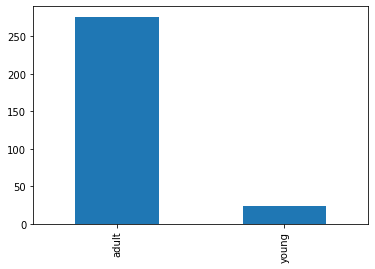

In [16]:
all_horses_df['Age'].value_counts().plot(kind='bar')

In [17]:
adult = all_horses_df['Age'][ all_horses_df['Age'] == 'adult' ].count()
young = all_horses_df['Age'][ all_horses_df['Age'] == 'young' ].count()

print(f'Horses that had surgery: {adult}, {round(adult/all_horses_df["Age"].count()*100, 1)}%')
print(f'Horses that hadn\'t surgery: {young}, {round(young/all_horses_df["Age"].count()*100, 1)}%')

Horses that had surgery: 276, 92.0%
Horses that hadn't surgery: 24, 8.0%


## Hospital Number

In [18]:
all_horses_df['Hospital_Number'].nunique()

284

Есть повторы, проверим это дубликаты или ошибка в номере

In [19]:
duplicate = []
number =  all_horses_df.sort_values(by='Hospital_Number', ascending=True)['Hospital_Number'][0]

for value in all_horses_df.sort_values(by='Hospital_Number', ascending=True)['Hospital_Number'][1:]:
    if value != number:
        number = value
    else:
        duplicate.extend([value, number])
    duplicate = list(set(duplicate))
    
    

In [20]:
all_horses_df[ all_horses_df['Hospital_Number'].isin(duplicate)].sort_values(by='Hospital_Number', ascending=True)

,surgery,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,pain,peristalsis,abdominal_distension,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_PH,rectal_examination_feces,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion,type_of_lesion_1,type_of_lesion_2,type_of_lesion_3,cp_data
282,surgery,adult,527544,NaN,70.0,16.0,3,4,5,2,2,3,2,2,1,NaN,4,5,60.0,7.5,NaN,NaN,2,1,1400,0,0,2
110,surgery,adult,527544,NaN,70.0,16.0,3,4,5,2,2,3,2,2,1,NaN,4,5,60.0,7.5,NaN,NaN,2,1,2112,0,0,2
166,surgery,adult,527916,38.3,40.0,18.0,1,1,1,1,3,1,1,NaN,NaN,NaN,2,1,43.0,5.9,1,NaN,1,2,0,0,0,1
160,surgery,adult,527916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,1,1,NaN,NaN,5,35.0,58.0,2,1.0,1,1,4205,0,0,2
179,no_surgery,adult,528151,38.5,100.0,NaN,3,3,5,2,4,3,4,2,1,NaN,4,5,NaN,NaN,NaN,NaN,3,2,1111,0,0,1
205,no_surgery,adult,528151,38.5,100.0,NaN,3,3,5,2,4,3,4,2,1,NaN,4,5,NaN,NaN,NaN,NaN,3,2,4124,0,0,2
235,surgery,adult,528469,38.1,52.0,24.0,1,1,5,1,4,3,1,2,3,7.0,1,NaN,54.0,7.5,2,2.6,2,1,2206,0,0,1
73,surgery,adult,528469,38.1,52.0,24.0,1,1,5,1,4,3,1,2,3,7.0,1,NaN,54.0,7.5,2,2.6,2,1,2112,0,0,1
94,no_surgery,adult,528729,37.5,48.0,30.0,4,1,3,1,NaN,2,1,1,1,NaN,1,1,48.0,8.6,NaN,NaN,1,2,0,0,0,2
234,no_surgery,adult,528729,37.5,48.0,30.0,4,1,3,1,NaN,2,1,1,1,NaN,1,1,48.0,8.6,NaN,NaN,1,2,400,0,0,2


Причина дублирования пока не ясна. Возможно было несколько принципов/источников формирования дубликатов:
- различаются только type_of_lesion_1 - причиной осложнения, дублирование могло происходить из-за ограничений системы вводы данных (не хватало места, нельзя редактировать, ввод с разницей во времени и пр)
- различаются так же результаты анализов - лошадь проходила больше одной операции
- человеческий фактор (ввели не тот номер в систему, присвоили не тот номер и пр)

Чтобы сделать обоснованные вывода необходимо больше информации о датасете
Пока стоит оставить данные в том виде в котором они есть

### rectal_temperature

- linear
- in degrees celsius.
- An elevated temp may occur due to infection.
- temperature may be reduced when the animal is in late shock
- normal temp is 37.8
- this parameter will usually change as the problem progresses eg. may start out normal, then become elevated because of the lesion, passing back through the normal range as the horse goes into shock

**неприрывное**


In [21]:
print(all_horses_df['rectal_temperature'].isna().sum())
print(all_horses_df['rectal_temperature'].isna().sum()/all_horses_df['rectal_temperature'].count()*100, '%')

60
25.0 %


60 значений пропущено. Это четверть значений.
Исходя из описания повышенная температура может быть связана с инфекцией, послеоперационными осложнениями, пониженная с шоком. 
Скорее всего самым оптимальным будет замена пропусков на средние значния внутри группы

Text(0.5, 1.0, 'Распределение температуры лошадей')

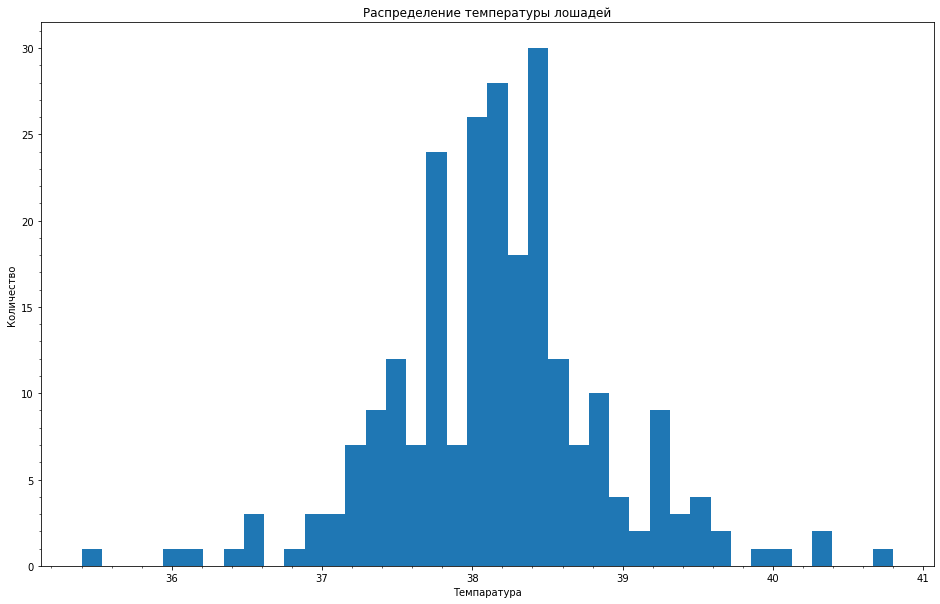

In [56]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots(figsize=(16, 10))

ax.hist(all_horses_df['rectal_temperature'], bins=40)
ax.xaxis.set_major_locator(MultipleLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('Темпаратура')
plt.ylabel('Количество')
plt.title('Распределение температуры лошадей')

Распределение выглядит нормальным, провалы в графике могут быть свзязаны с пропусками данных

In [83]:
# all_horses_df[['rectal_temperature', 'surgery', 'pulse', 'respiratory_rate', 'surgical_lesion', 'outcome']]\
# .groupby(by=[ 'surgery',  'surgical_lesion', 'outcome']).mean()

In [82]:
# fig2, ax2 = plt.subplots(figsize=(16, 10))

# ax2.hist(all_horses_df[ all_horses_df['outcome'] == '1' ]['rectal_temperature'], bins=40)
# ax2.xaxis.set_major_locator(MultipleLocator())
# ax2.xaxis.set_minor_locator(AutoMinorLocator(5))
# ax2.yaxis.set_minor_locator(AutoMinorLocator())
# plt.xlabel('Темпаратура')
# plt.ylabel('Количество')
# plt.title('Распределение температуры лошадей с послеоперационными осложнениями')


По каждому:
    -базовые статистики (мин, макс, средние, дисперсия)
<!--     - корелляция с другими -->
    - боксплот